### Подключим библиотеки

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math

%matplotlib inline
import matplotlib.pyplot as plt

### Получим данные

In [2]:
# Константы
L = 367e-3
r_1 = 0.05e-3 / 2
r_2 = 10e-3 / 2
R_0 = 10
temp_values = ['21', '30', '50', '54']

# Массив данных
d0 = np.transpose(np.array(pd.read_csv('data0.csv', header=None, sep=';')))
d1 = np.transpose(np.array(pd.read_csv('data1.csv', header=None, sep=';')))
d2 = np.transpose(np.array(pd.read_csv('data2.csv', header=None, sep=';')))
d3 = np.transpose(np.array(pd.read_csv('data3.csv', header=None, sep=';')))

data = np.array([d0, d1, d2, d3])

print('Сырые данные (Uэ, Uн)\n' + '-' * 80)
    
for d in data:
    print(d)
    print('-' * 80)

Сырые данные (Uэ, Uн)
--------------------------------------------------------------------------------
[[0.050032 0.075026 0.100038 0.12507  0.14993  0.20047  0.22498  0.25007 ]
 [0.7528   1.1292   1.5065   1.8846   2.2613   3.0297   3.4045   3.7892  ]]
--------------------------------------------------------------------------------
[[0.050149 0.075086 0.100113 0.12519  0.15011  0.19993  0.22501  0.2505  ]
 [0.76097  1.1398   1.5205   1.9025   2.2831   3.0469   3.4333   3.8271  ]]
--------------------------------------------------------------------------------
[[0.050035 0.075006 0.10004  0.12501  0.15019  0.20006  0.22504  0.25    ]
 [0.77359  1.16     1.5474   1.9359   2.327    3.1054   3.496    3.8888  ]]
--------------------------------------------------------------------------------
[[0.050017 0.075012 0.099987 0.12499  0.15     0.20001  0.22501  0.25003 ]
 [0.77579  1.16388  1.5518   1.9414   2.3304   3.1135   3.5066   3.9015  ]]
--------------------------------------------------

### Построим график $Q(R)$ для каждой из температур

$$Q = \frac{U_\text{н}U_\text{э}}{10}$$

$$R = 10\frac{U_\text{н}}{U_\text{э}}$$

Определим по графику наклон $\dfrac{dQ}{dR}$ и сопротивление нити $R_0$ при нулевой выделяемой мощности.

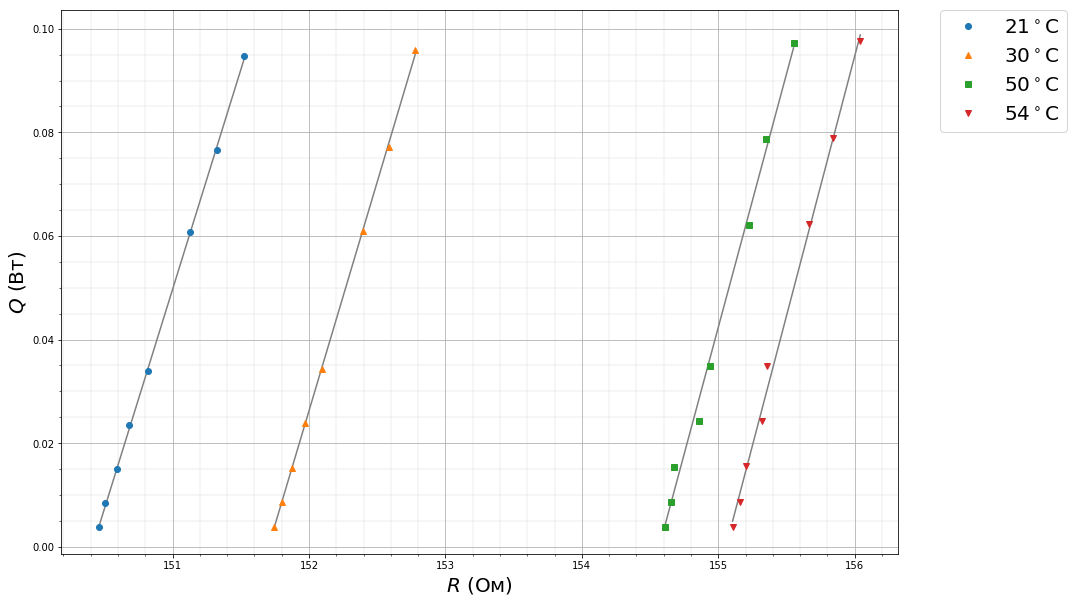

  dQ/dR          R
[[8.47828162e-02 1.50414272e+02]
 [8.83533676e-02 1.51703251e+02]
 [9.78338081e-02 1.54567531e+02]
 [1.00287732e-01 1.55056015e+02]]


In [3]:
# Аппроксимация по МНК
def f(x, a, b):
    return a * x + b

def f1(y, a, b):
    return (y - b) / a

markers = ['o', '^', 's', 'v']
plt.figure(figsize = (15, 10))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.ylabel('$Q$ (Вт)', fontsize=20)
plt.xlabel('$R$ (Ом)', fontsize=20)

dqdr = []
r = []
for i in range(4):
    dr = 10 * data[i][1] / data[i][0]
    dq = data[i][0] * data[i][1] / 10
    q_r_opt, q_r_cov = curve_fit(f, dr, dq)
    plt.plot(dr, f(dr, *q_r_opt), color='grey')
    plt.plot(dr, dq, marker=markers[i], linestyle='', label=(temp_values[i] + '$^\circ$C'))
    dqdr.append(q_r_opt[0])
    r.append(f1(0, *q_r_opt))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
plt.show()

print(' ' * 2 + 'dQ/dR' + ' ' * 10 + 'R')
print(np.transpose([dqdr, r]))

In [4]:
r = np.array(r)
t = np.array([21.1, 30.0, 49.95, 54.05])

print(' ' * 2 + 'R' + ' ' * 13 + 'T')
print(np.transpose([r, t]))

  R             T
[[150.41427194  21.1       ]
 [151.70325143  30.        ]
 [154.56753129  49.95      ]
 [155.05601549  54.05      ]]


### Построим по значениям $R_0$ график зависимости сопротивления нити от температуры. 
Определим по графику наклон $\dfrac{dR}{dT}$ и температурный коэффициент сопротивления материала нити $\alpha = \dfrac{1}{R_{273}}\dfrac{dR}{dT}$ и сравним его с табличным значением.

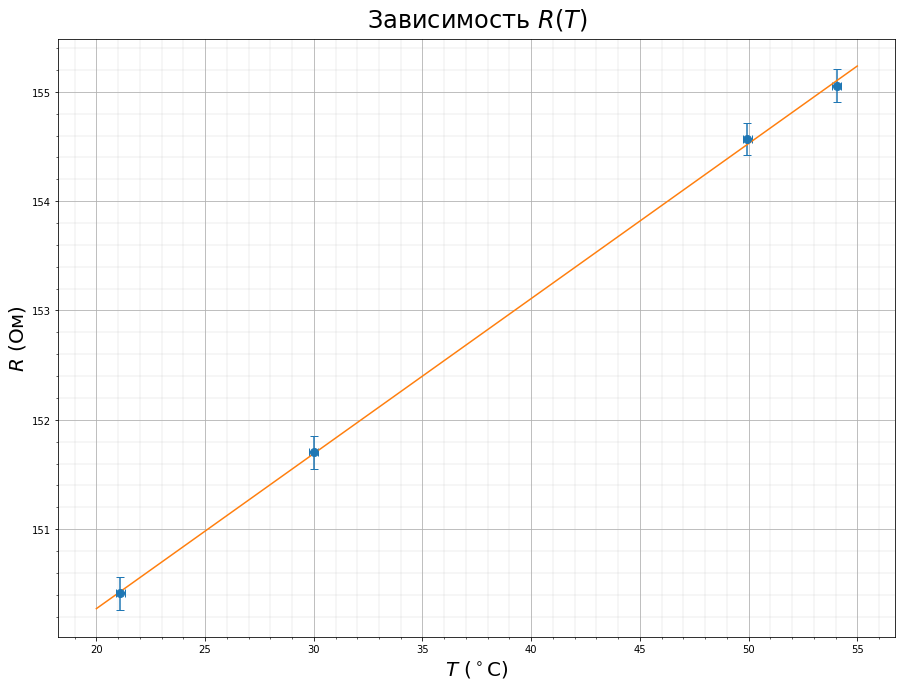

          R = aT + b

a                   b = R(0)
0.14179071489101658 147.43733256575285


In [5]:
r_t_opt, r_t_cov = curve_fit(f, t, r)

plt.figure(figsize = (15, 11))
plt.title('Зависимость $R(T)$', fontsize=24, pad=12)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$T$ ($^\circ$С)', fontsize=20)
plt.ylabel('$R$ (Ом)', fontsize=20)
plt.errorbar(t, r, linestyle='', marker='o', xerr=0.2, yerr=0.15, markersize=8, capsize=4)
xdata = np.arange(20, 56)
plt.plot(xdata, f(xdata, *r_t_opt))
plt.show()

print(' ' * 10 + 'R = aT + b' + '\n')
print('a' + ' ' * 19 + 'b = R(0)')
print(*r_t_opt)

$$ R_{273} \approx 147,44 \hspace{2pt}\text{Ом}, \hspace{20pt} \frac{dR}{dT} \approx 0,142 \hspace{2pt}\frac{\text{Ом}}{\text{К}}, $$

In [6]:
alpha = r_t_opt[0] / f(0, *r_t_opt)
print('alpha =', alpha)

alpha = 0.0009617015746522812


Отсюда

$$ \alpha \approx 9,617 \cdot 10^{-4} \hspace{2pt} \hspace{2pt}\text{К}^{-1} .$$

### Оценим погрешность $\frac{dR}{dT}$.

In [7]:
eps_t = 0.2 / 294.25
print('относительная погрешность T: ', eps_t)
eps_r = 0.000035 * math.sqrt(2) / 0.05

print('\n' + '-' * 12 + 'Погрешность R' + '-' * 12)
print('относительная:', eps_r)
sigma_r = eps_r * max(r)
print('абсолютная:' + ' ' * 3, sigma_r)
'''sigma_r = math.sqrt(sigma_r ** 2 + s ** 2)
print('полная абсолютная:' + ' ' * 13, sigma_r)
eps_r = sigma_r / min(r)
print('полная относительная:' + ' ' * 10, eps_r)'''

eps_drdt = math.sqrt(eps_t ** 2 + eps_r ** 2)
sigma_drdt = eps_drdt * r_t_opt[0]

print('\n' + '-' * 15 + 'Погрешность dR/dT' + '-' * 15)
print('среднеквадратическая' + ' ' * 3, r_t_cov[0, 0])
print('полная абсолютная:' + ' ' * 5, sigma_drdt)
print('полная относительная:' + ' ' * 2, eps_drdt)

print('\n' + '-' * 10 + 'Погрешность alpha' + '-' * 10)
print('относительная ', math.sqrt(eps_r ** 2 + eps_drdt ** 2))
print('абсолютная' + ' ' * 4, alpha * math.sqrt(eps_r ** 2 + eps_drdt ** 2))

относительная погрешность T:  0.000679694137638063

------------Погрешность R------------
относительная: 0.0009899494936611664
абсолютная:    0.15349762402219178

---------------Погрешность dR/dT---------------
среднеквадратическая    3.132588897482099e-06
полная абсолютная:      0.00017026603830937783
полная относительная:   0.0012008264323954358

----------Погрешность alpha----------
относительная  0.0015562725085085678
абсолютная     1.4966697220207454e-06


\begin{aligned}
    &\sigma_T = 0,2 \hspace{2pt}\text{К} \\
    &\varepsilon_T \approx 0,001 \\
\end{aligned}

\begin{aligned}
    &\sigma_R \approx 0,15 \hspace{2pt}\text{Ом} \\
    &\varepsilon_R \approx 0,001
\end{aligned}

\begin{aligned}
    &\sigma_{dR/dT} \approx 0,0017 \hspace{2pt}\frac{\text{Ом}}{\text{К}} \\
    &\varepsilon_{dR/dT} \approx 0,0012
\end{aligned}

\begin{aligned}
    &\varepsilon_\alpha = \sqrt{\varepsilon_R^2 + \varepsilon_{dR/dT}^2} \approx 0,00156 \\
    &\sigma_\alpha \approx 0,015 \cdot 10^{-4} \hspace{2pt}\text{К}^{-1}
\end{aligned}

### Для каждой температуры определим значение $\varkappa$.

$$ \varkappa = \frac{dQ}{dT} \cdot \frac{1}{2\pi L} \ln\frac{r_2}{r_1} $$

$$ \frac{dQ}{dT} = \frac{dQ}{dR} \frac{dR}{dT} $$

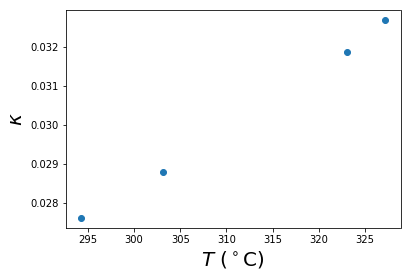

  kappa          T
[[2.76215259e-02 2.94250000e+02]
 [2.87847814e-02 3.03150000e+02]
 [3.18734289e-02 3.23100000e+02]
 [3.26728966e-02 3.27200000e+02]]


In [8]:
dqdt = np.array(dqdr) * r_t_opt[0]
kappa = dqdt * math.log(r_2 / r_1) / (2 * math.pi * L)
t = np.array([21.1, 30.0, 49.95, 54.05]) + 273.15

plt.xlabel('$T$ ($^\circ$С)', fontsize=20)
plt.ylabel('$\kappa$', fontsize=20)
plt.plot(t, kappa, linestyle='', marker='o')
plt.show()

print(' ' * 2 + 'kappa' + ' ' * 10 + 'T')
print(np.transpose([kappa, t]))

### Оценим погрешность $\varkappa$.

In [9]:
def g(x, a, b):
    return a * (x ** b)

k_t_opt, k_t_cov = curve_fit(g, t, kappa)

eps_kappa = math.sqrt(eps_drdt ** 2 + eps_r ** 2)
sigma_kappa = eps_kappa * max(kappa)

s = 0
for i in range(len(t)):
    s += (kappa[i] - g(t[i], *k_t_opt)) ** 2
s = math.sqrt(s / (len(t) * (len(t) - 1)))

print('\n' + '-' * 11 + 'Погрешность kappa' + '-' * 11)
print('случайная:' + ' ' * 6, s)
print('систематическая:', sigma_kappa)
sigma_kappa = math.sqrt(sigma_kappa ** 2 + s ** 2)
print('абсолютная:' + ' ' * 5, sigma_kappa)
eps_kappa = sigma_kappa / min(kappa)
print('относительная:' + ' ' * 2, eps_kappa)


-----------Погрешность kappa-----------
случайная:       4.685549921849913e-05
систематическая: 5.084793079235543e-05
абсолютная:      6.914441317184593e-05
относительная:   0.0025032799949303384


\begin{aligned}
    &\sigma_\varkappa \approx 0,00007 \\
    &\varepsilon_\varkappa \approx 0,0025
\end{aligned}

In [10]:
print('A' + ' ' * 22 + 'beta')
print(*k_t_opt)

A                      beta
3.3697268832108806e-06 1.5848007419830903


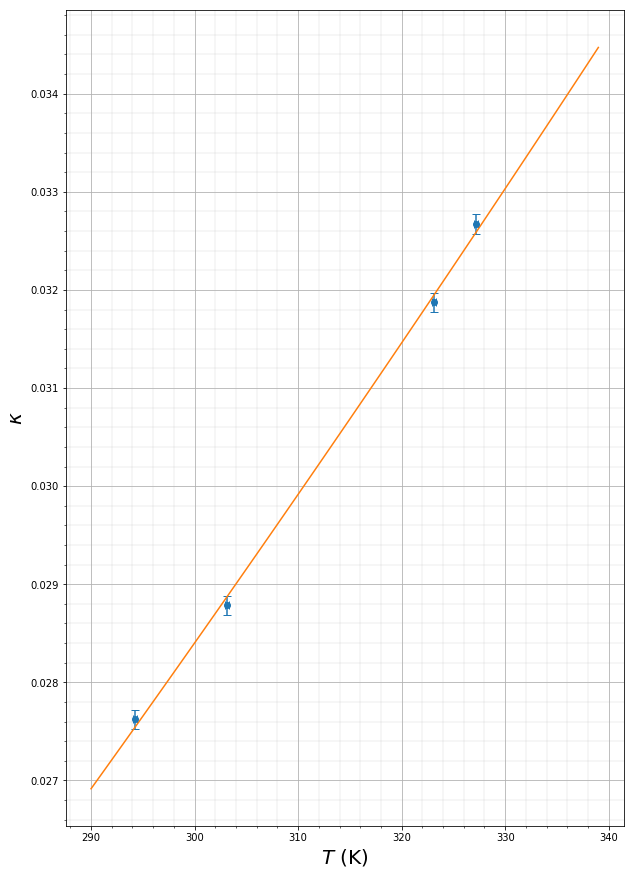

In [11]:
plt.figure(figsize = (10, 15))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$T$ (K)', fontsize=20)
plt.ylabel('$\kappa$', fontsize=20)
plt.errorbar(t, kappa, linestyle='', marker='o', xerr=0.2, yerr=0.0001, capsize=4)
xdata = np.arange(290, 340, 1)
ydata = g(xdata, *k_t_opt)
plt.plot(xdata, ydata)
plt.show()

In [12]:
ln_kappa = np.array([math.log(i) for i in kappa])
ln_t = np.array([math.log(i) for i in t])

ln_k_t_opt, ln_k_t_cov = curve_fit(f, ln_t, ln_kappa)
beta = ln_k_t_opt[0]

print('beta' + ' ' * 16 + 'lnA')
print(*ln_k_t_opt)

beta                lnA
1.5808080317966688 -12.577745058373372


$$\beta \approx 1,5808$$

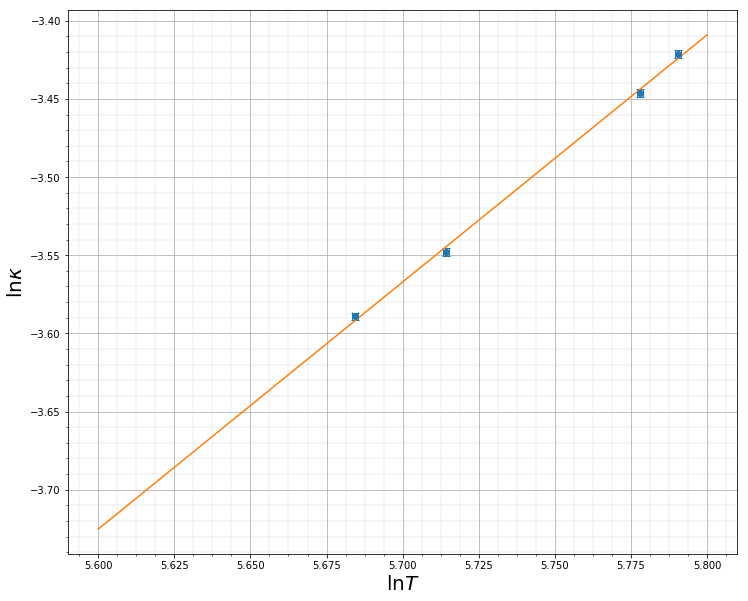

In [13]:
plt.figure(figsize = (12, 10))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$\ln T$', fontsize=20)
plt.ylabel('$\ln\kappa$', fontsize=20)
plt.errorbar(ln_t, ln_kappa, linestyle='', marker='o', xerr=0.001, yerr=0.0025, capsize=4)
xdata = np.arange(5.6, 5.8, 0.1)
ydata = f(xdata, *ln_k_t_opt)
plt.plot(xdata, ydata)
plt.show()

Погрешность логарифма величины равна ее относительной погрешности.

### Оценим погрешность $\beta$.

In [14]:
s = ln_k_t_cov[0, 0]

sigma_beta = math.sqrt((eps_kappa / min(ln_t)) ** 2 + (eps_t * beta) ** 2)

print('\n' + '-' * 11 + 'Погрешность beta' + '-' * 11)
print('случайная:' + ' ' * 6, s)
print('систематическая:', sigma_beta)
sigma_beta = math.sqrt(sigma_beta ** 2 + s ** 2)
print('абсолютная:' + ' ' * 5, sigma_beta)
print('относительная:' + ' ' * 2, sigma_beta / beta)


-----------Погрешность beta-----------
случайная:       0.0018924967458241147
систематическая: 0.0011612093289341432
абсолютная:      0.0022203493055279718
относительная:   0.0014045660579067476


$$\sigma_{\beta(\varkappa, T)}^2 = \left(\frac{\partial\beta}{\partial\varkappa}\right)^2\sigma\varkappa^2 + \left(\frac{\partial\beta}{\partial T}\right)^2\sigma_T^2 =$$

$$= \left(\frac{\sigma_\varkappa}{\varkappa\ln T}\right)^2 + \left(\frac{\sigma_T\ln\varkappa}{T\ln T}\right)^2 = \left(\frac{\varepsilon_\varkappa}{\ln T}\right)^2 + (\varepsilon_T\beta)^2 $$



\begin{aligned}
    &\sigma_\beta^\text{случ} \approx 0,0019 \\
    &\sigma_\beta^\text{сист} \approx 0,0012 \\
    &\sigma_\beta \approx 0,0022 \\
    &\varepsilon_\beta \approx 0,01
\end{aligned}